<a href="https://colab.research.google.com/github/xiaonanY0317/527-Project/blob/main/Exploring_Influence_Factors_of_IBM_Employees_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Influence Factors of IBM Employees Attrition
What will bring if an Organization facing high Attrtion:
1.   Expensive in terms of both money and time to train new employees.
2.   Loss of experienced employees
3.   Impact in productivity
4.   Impact profit

What we plan to do?
1.   Data Cleaning
2.   Exploratory Data Analysis
3.   Data Modeling and model comparison
4.   Model parameter optimization
5.   Verification, Testing

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.neighbors import LocalOutlierFactor

## **Exploratory** **Data** **Analysis**

### Data description

In [226]:
#Import Dataset
data_url = "https://drive.google.com/uc?id={}".format("1QQr8WzF21yb2Z7N1vmf2Sqsx_mU2TPJZ")
data = pd.read_csv(data_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [227]:
pd.pandas.set_option('display.max_columns', None)
data.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   
5                        4    Male          79               3         1   
6                        3  Female          81               4         1   
7                        4    Male          67               3         1   
8                        4    Male          44               2         3   
9                        3    Male          94               3         2   

                     JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0            Sales Executive                4        Single           5993   
1         Research Scientist                2       Married           5130   
2      Laboratory Technician                3        Single           2090   
3         Research Scientist                3       Married           2909   
4      Laboratory Technician                2       Married           3468   
5      Laboratory Technician                4        Single           3068   
6      Laboratory Technician                1       Married           2670   
7      Laboratory Technician                3      Divorced           2693   
8     Manufacturing Director                3        Single           9526   
9  Healthcare Representative                3       Married           5237   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   
5        11864                   0      Y       No                 13   
6         9964                   4      Y      Yes                 20   
7        13335             

In [228]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [229]:
# check the unique values for each columns.
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}", "\n")

Age: Number of unique values 43 

Attrition: Number of unique values 2 

BusinessTravel: Number of unique values 3 

DailyRate: Number of unique values 886 

Department: Number of unique values 3 

DistanceFromHome: Number of unique values 29 

Education: Number of unique values 5 

EducationField: Number of unique values 6 

EmployeeCount: Number of unique values 1 

EmployeeNumber: Number of unique values 1470 

EnvironmentSatisfaction: Number of unique values 4 

Gender: Number of unique values 2 

HourlyRate: Number of unique values 71 

JobInvolvement: Number of unique values 4 

JobLevel: Number of unique values 5 

JobRole: Number of unique values 9 

JobSatisfaction: Number of unique values 4 

MaritalStatus: Number of unique values 3 

MonthlyIncome: Number of unique values 1349 

MonthlyRate: Number of unique values 1427 

NumCompaniesWorked: Number of unique values 10 

Over18: Number of unique values 1 

OverTime: Number of unique values 2 

PercentSalaryHike: Number of uni

In [230]:
# drop columns with only one valaue and with unique value to every row.
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

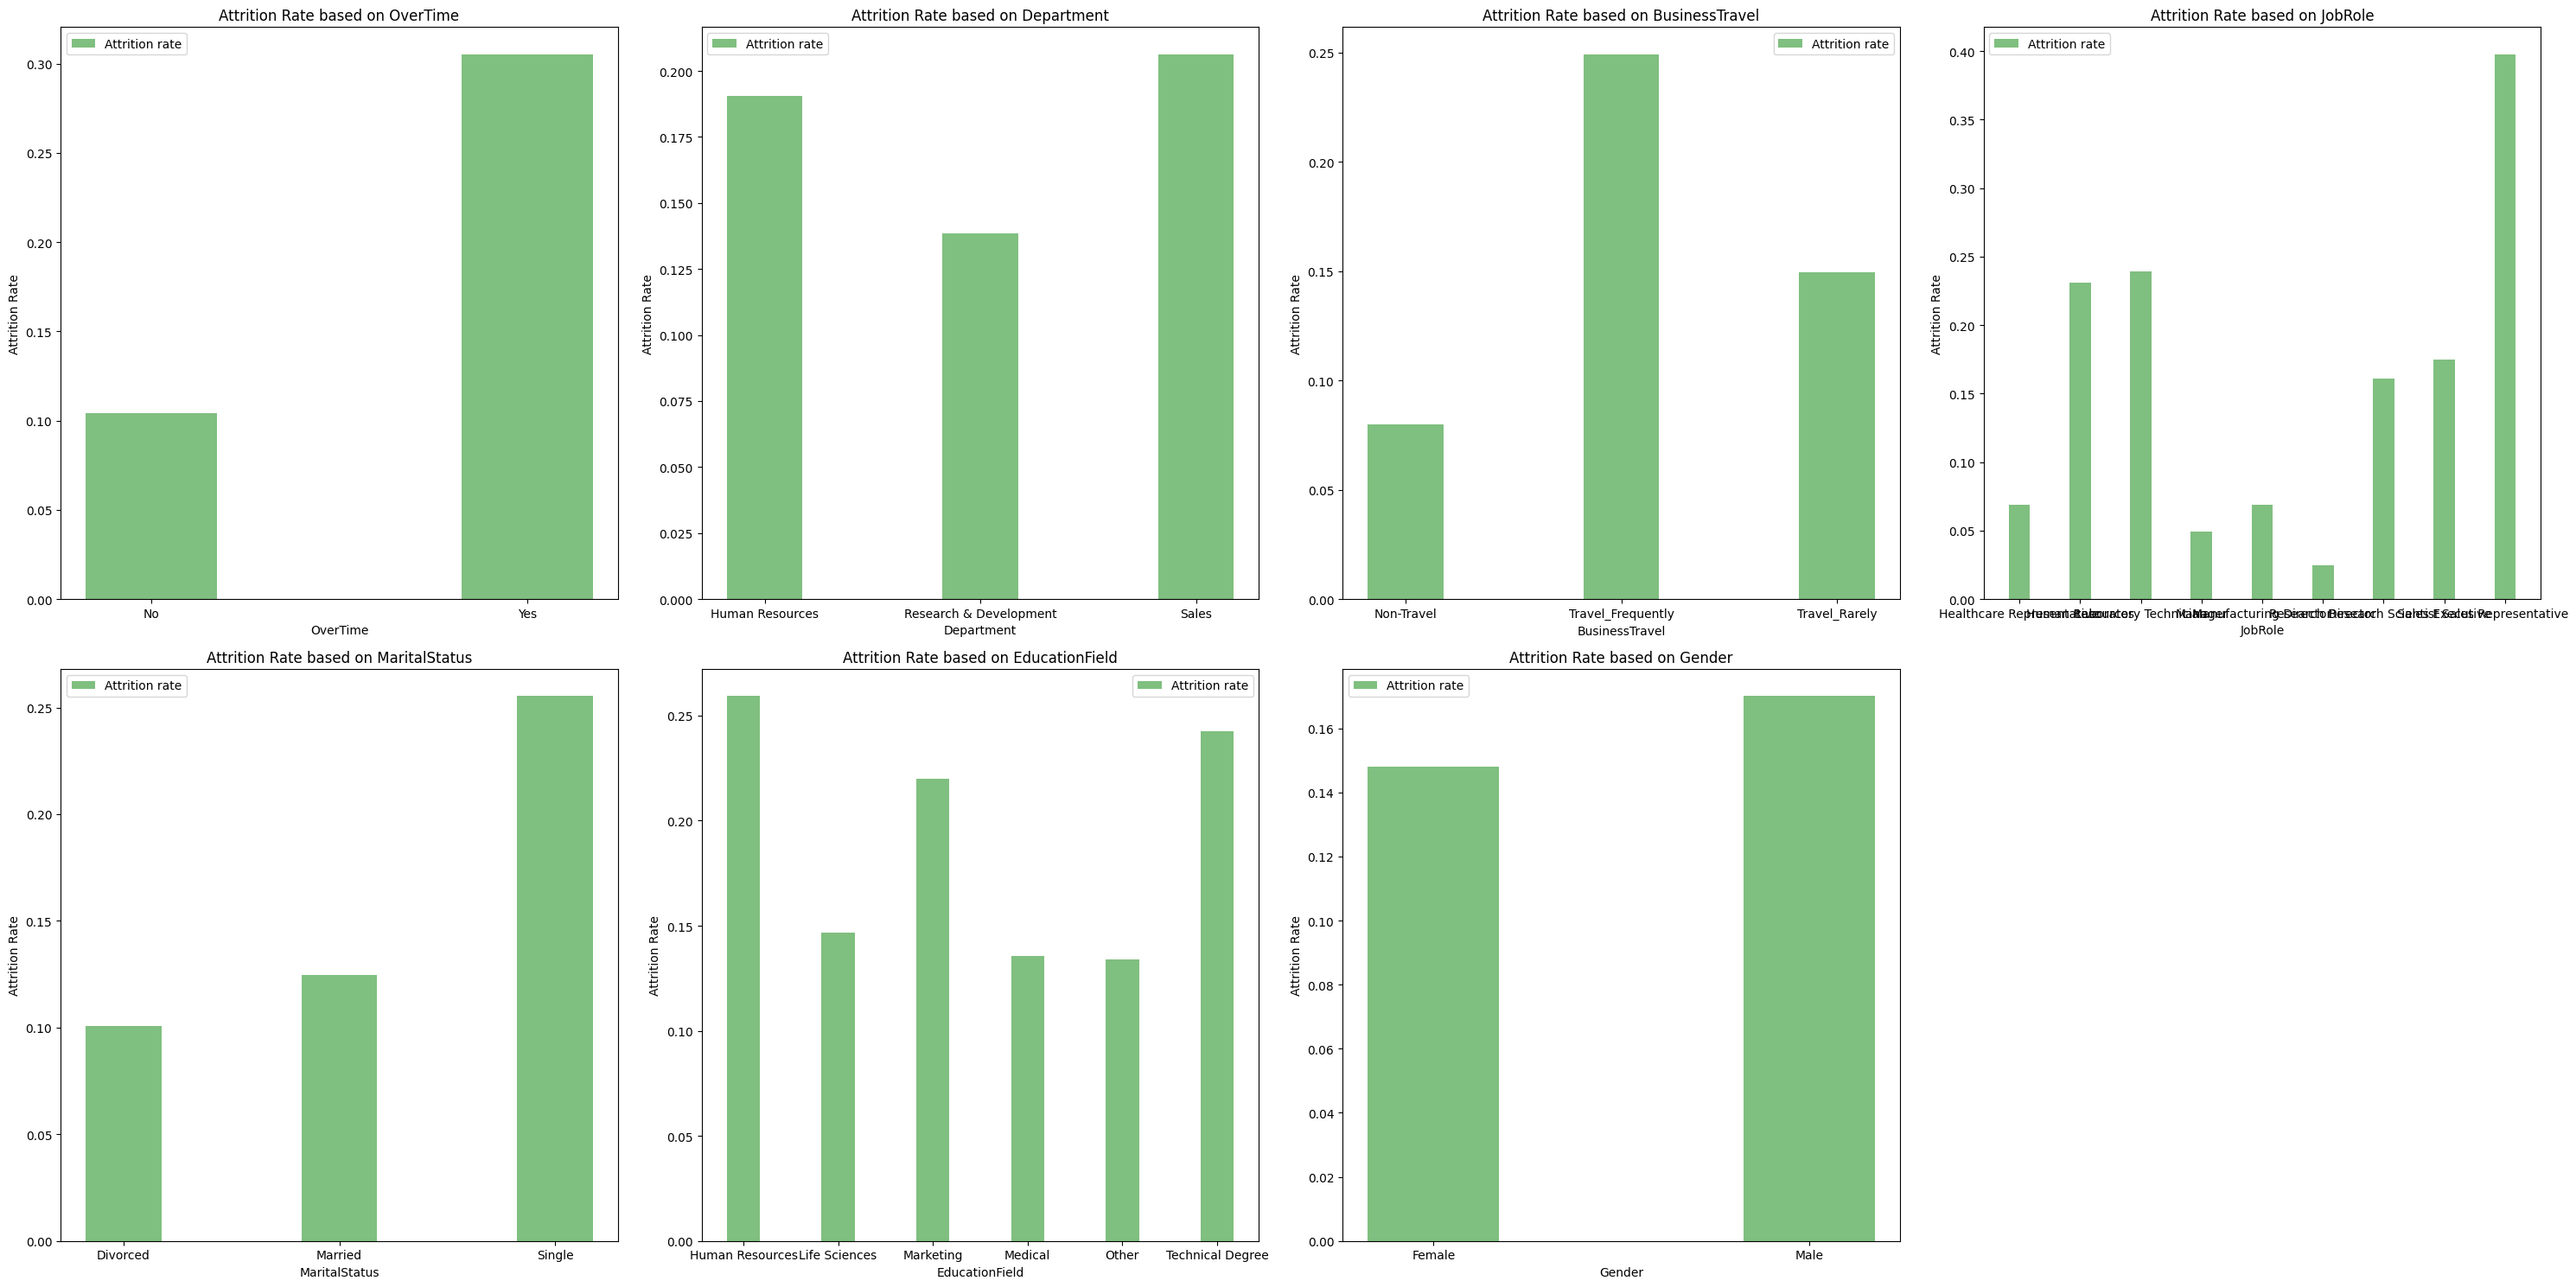

In [232]:
# find out categorical columns
num_cols = data._get_numeric_data().columns
cat_cols = list(set(data.columns) - set(num_cols))

# convert categorical data into numerical
lable = LabelEncoder()
data["Attrition"] = lable.fit_transform(data["Attrition"])

# draw histogram to see if these categorical data have relationship with Attrition
Attrition_yes = data[data["Attrition"] == 1]
Attrition_no = data[data["Attrition"] == 0]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
for i, column in enumerate(cat_cols):
    row, col = divmod(i, 4)
    value_yes = Attrition_yes[column].value_counts().sort_index()
    value_no = Attrition_no[column].value_counts().sort_index()
    value = data[column].value_counts().sort_index()
    rate_yes = value_yes / value
    ax = axes[row, col]
    ax.bar(value_yes.index, rate_yes, label='Attrition rate', width=0.35, alpha=0.5, color='green')
    ax.set_xlabel(column)
    ax.set_ylabel('Attrition Rate')
    ax.set_title(f'Attrition Rate based on {column}')
    ax.legend()

for i in range(len(cat_cols), 2 * 4):
    row, col = divmod(i, 4)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

### Hypotheses Test

**the hypotheses for the relationship between JobLevel and Attrition**

The hypotheses for the relationship between JobLevel and Attrition:
Null Hypothesis (H0) Assumption:The attrition rates are equal across different job levels. H_0: mu_1 = mu_2 = mu_3 = ... = mu_n) mu_i represent the mean attrition rates for different job levels)
Alternative Hypothesis (H1): Assumption:The attrition rates vary across different job levels. H_1: At least two job levels have different mean attrition rates
If the test results reject the null hypothesis (H0), it indicates that there are significant differences in attrition rates among different job levels. If the test fails to reject the null hypothesis, it suggests that there is not enough evidence to support the idea that job levels significantly affect employee attrition rates.

In [233]:
#chi-squre


# Create a contingency table
contingency_table1 = pd.crosstab(data['Attrition'], data['JobLevel'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table1)

# Print results
print("Chi-square statistic:", chi2)
print("P-value:", p)

# Determine significance based on p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Attrition and JobLevel.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Attrition and JobLevel.")


contingency_table1

Chi-square statistic: 72.52901310667391
P-value: 6.634684715458909e-15
Reject the null hypothesis: There is a significant relationship between Attrition and JobLevel.


JobLevel     1    2    3    4   5
Attrition                        
0          400  482  186  101  64
1          143   52   32    5   5

**The hypotheses for the relationship between department and Attrition:**

In [234]:
# Create a contingency table
contingency_table2 = pd.crosstab(data['Attrition'], data['Department'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table2)

# Print results
print("Chi-square statistic:", chi2)
print("P-value:", p)

# Determine significance based on p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Attrition and Deparment.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Attrition and Department.")



contingency_table2

Chi-square statistic: 10.79600732241067
P-value: 0.004525606574479633
Reject the null hypothesis: There is a significant relationship between Attrition and Deparment.


Department  Human Resources  Research & Development  Sales
Attrition                                                 
0                        51                     828    354
1                        12                     133     92

Divide data into different department

In [235]:
# check the count for each department
data["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [236]:
data_department = data.groupby("Department")
department_data = {}
for department, department_df in data_department:
    department_data[department] = pd.DataFrame(department_df)

data_humanresources=department_data["Human Resources"]
data_research = department_data["Research & Development"]
data_sales = department_data["Sales"]

### Outlier detection

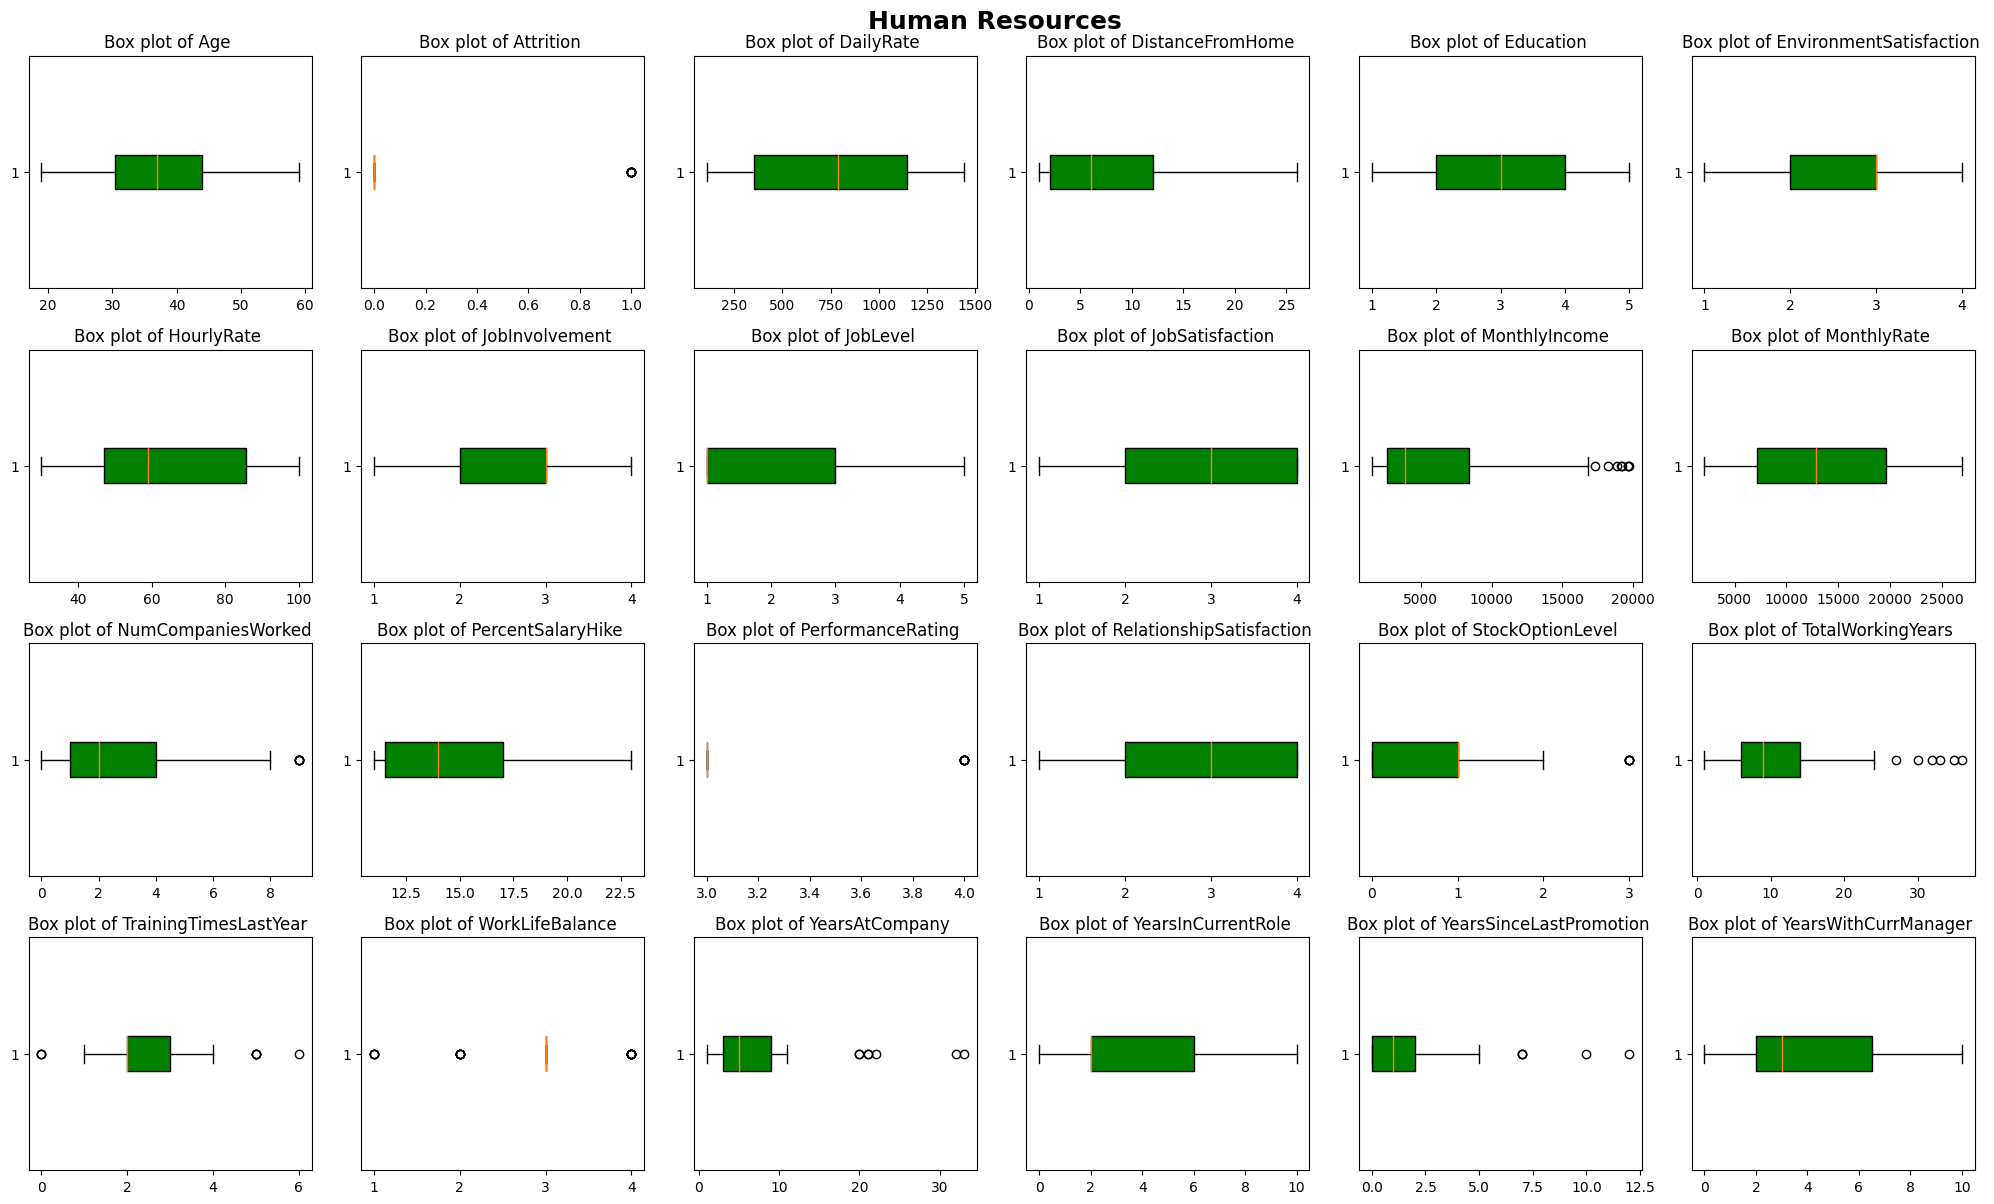

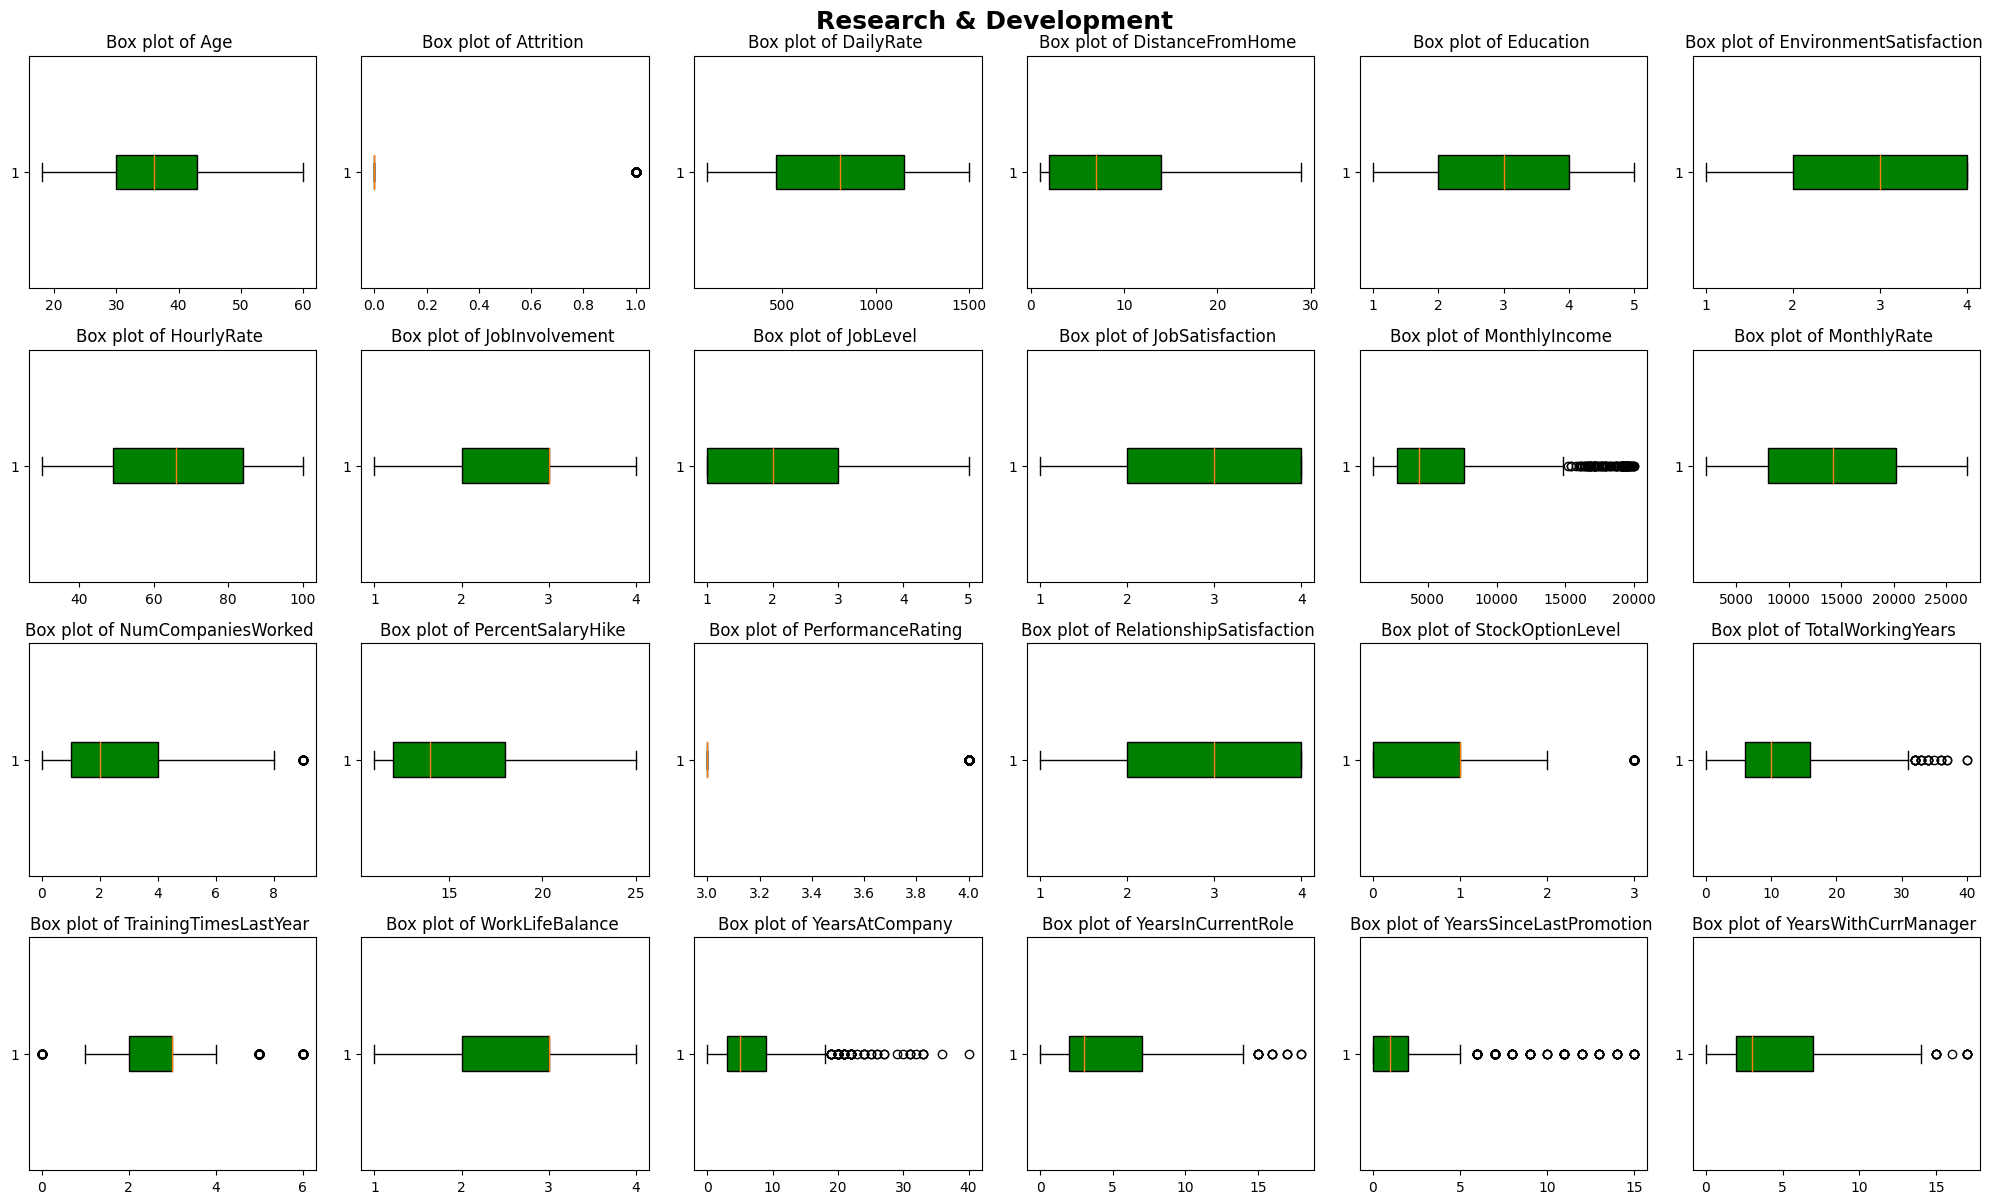

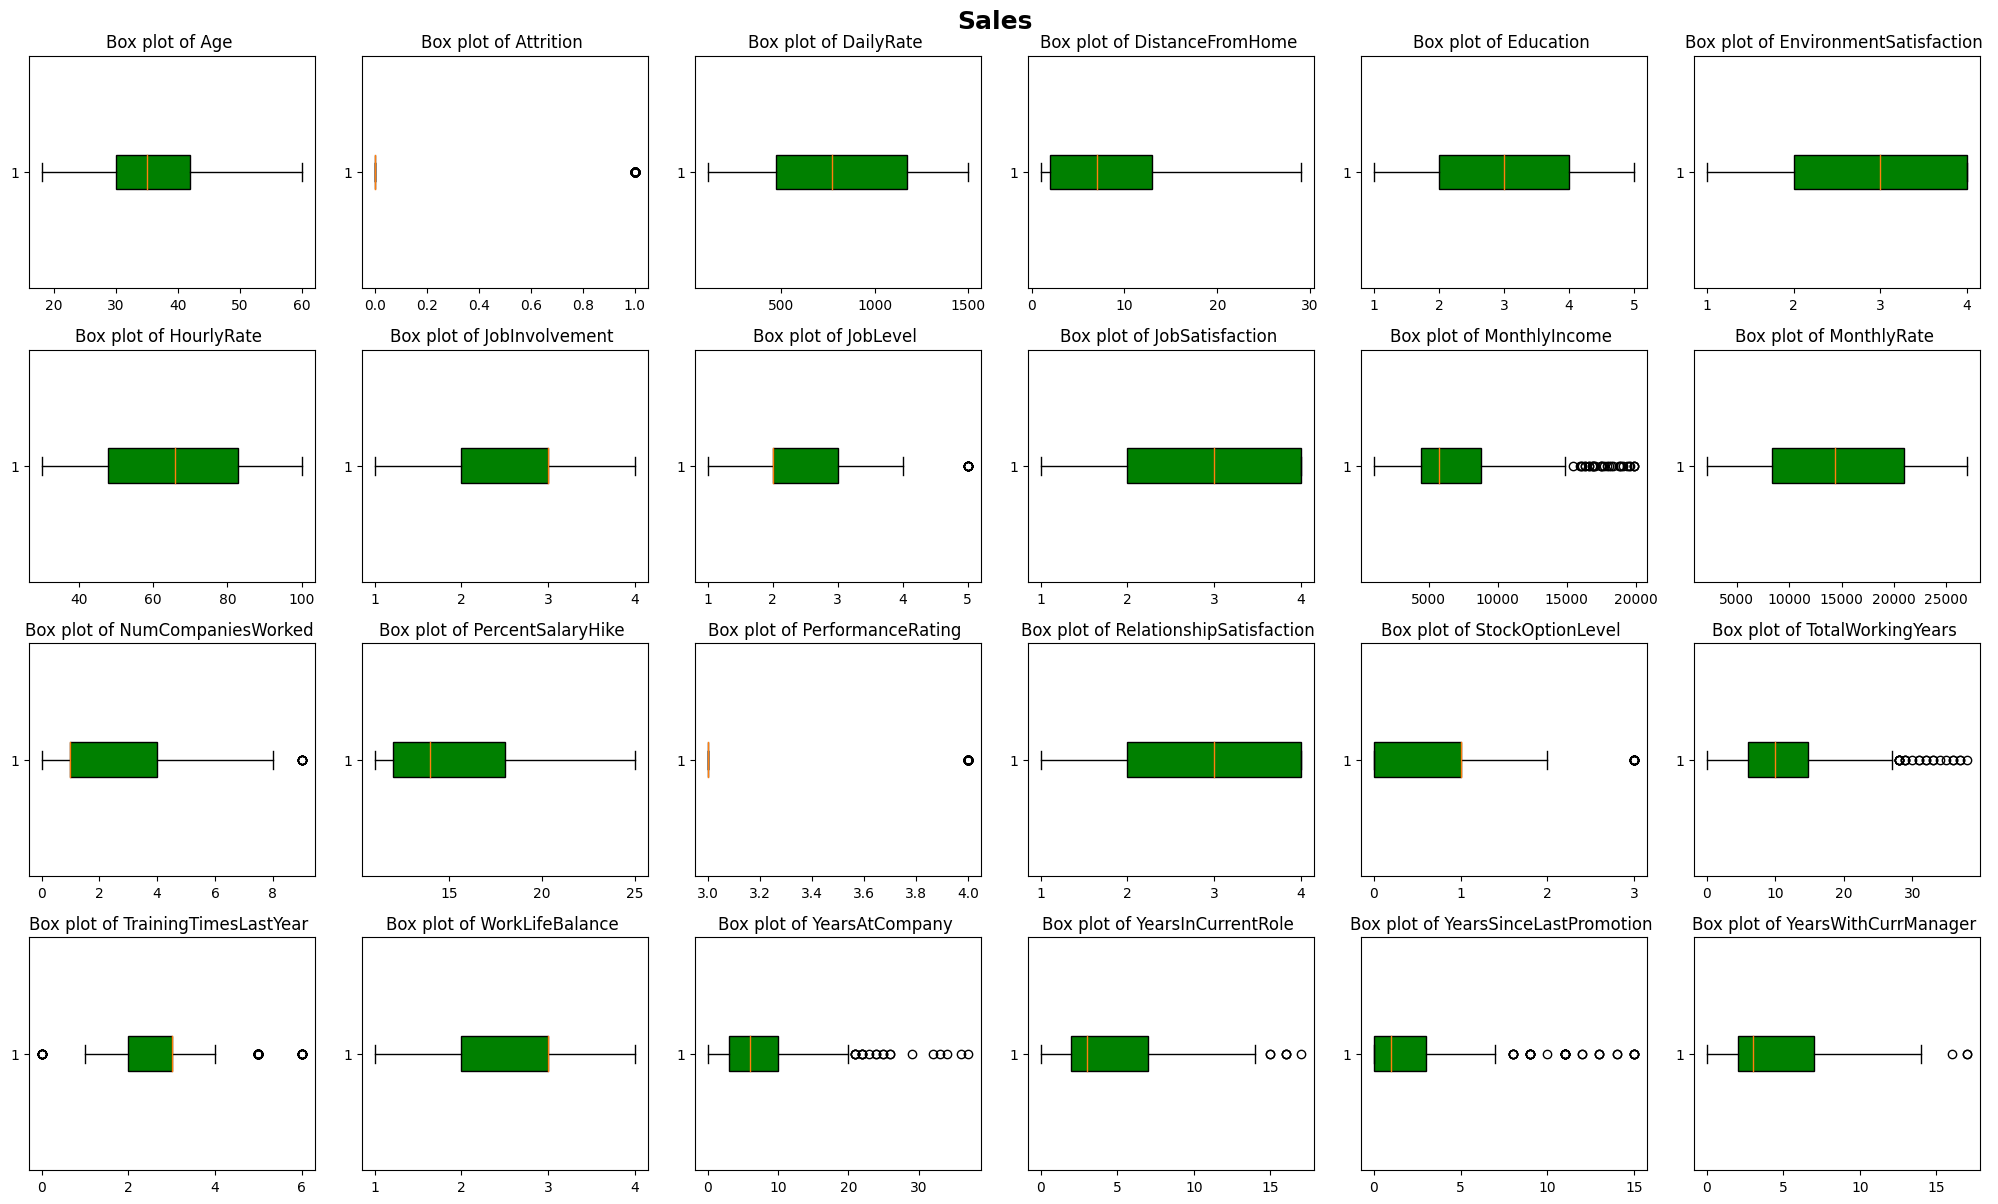

In [237]:
# Detect Outlier by drawing boxplot for each department
for department in department_data:
  data = department_data[department]
  int64_columns = [column for column in data.columns if data[column].dtype == 'int64']
  fig, axes = plt.subplots(5, 6, figsize=(20, 15))
  fig.suptitle(f'{department}', fontsize=18, fontweight='bold')
  for i,column in enumerate(int64_columns):
      row, col = divmod(i, 6)
      ax = axes[row, col]
      ax.boxplot(data[column],vert=False, patch_artist=True,boxprops=dict(facecolor='green'))
      ax.set_title(f"Box plot of {column} ")

  # delete empty plots
  for i in range(len(int64_columns), 5 * 6):
      row, col = divmod(i, 6)
      fig.delaxes(axes[row, col])

  plt.tight_layout()
plt.show()

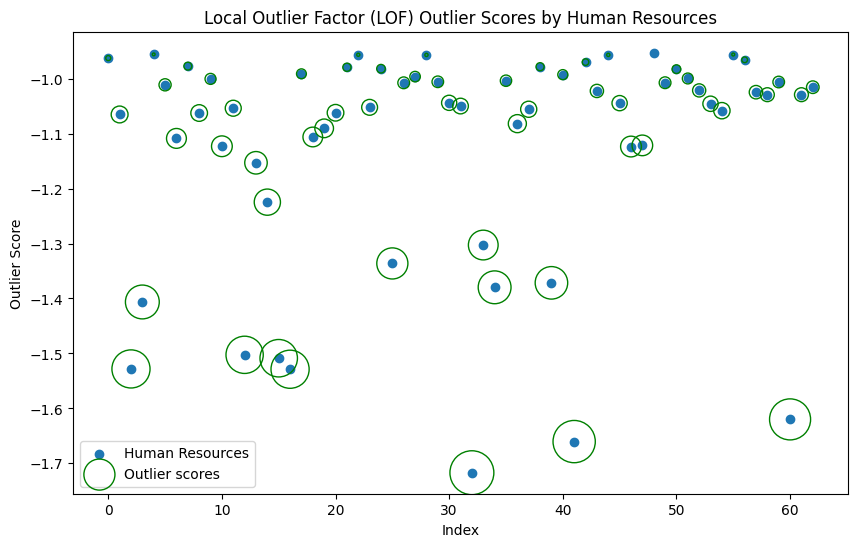

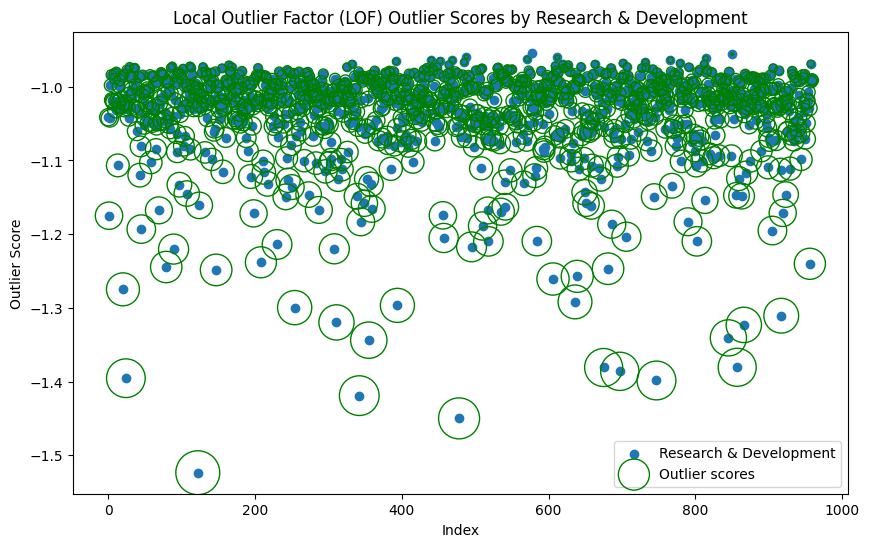

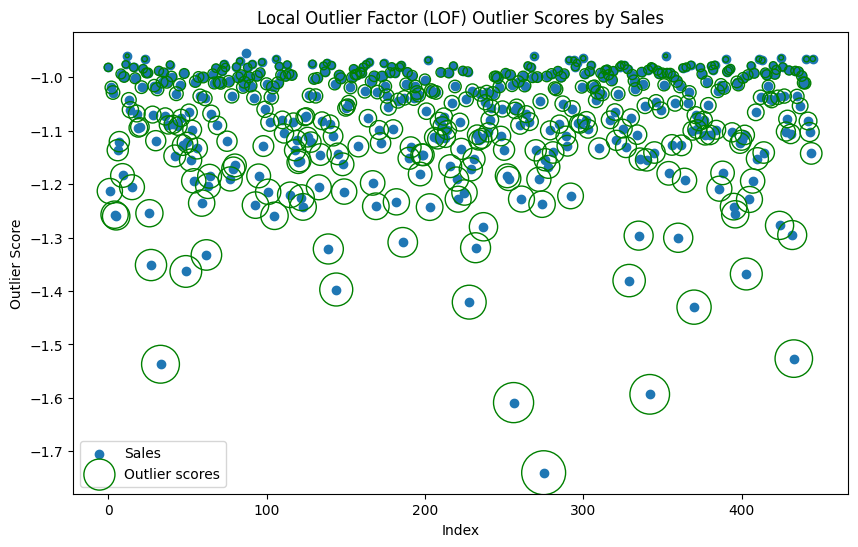

In [238]:
# Futhur Outlier detection by LOF
def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

scores={}
for department in department_data:
  data = department_data[department]
  int64_columns = [column for column in data.columns if data[column].dtype == 'int64']
  X = data[int64_columns]
  lof = LocalOutlierFactor(n_neighbors=20,contamination=0.1)
  outliers = lof.fit_predict(X)
  scores[department] = lof.negative_outlier_factor_
  X_scores = scores[department]

#plot the detection result
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(X_scores)), X_scores, label=department)
  radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
  scatter = plt.scatter(
  range(len(X_scores)),
  X_scores,
  s=1000 * radius,
  edgecolors="green",
  facecolors="none",
  label="Outlier scores",
)
  plt.legend(handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)})
  plt.xlabel("Index")
  plt.ylabel("Outlier Score")
  plt.title(f"Local Outlier Factor (LOF) Outlier Scores by {department}")
  plt.legend()
  plt.show()


In [205]:
# remove outlier
i=0
clean_data ={}
for department in department_data:
  data = department_data[department]
  threshold = -1.3
  not_outlier = scores[department] > threshold
  clean_data[department] = data[not_outlier].reset_index()

<ipython-input-206-aea1b68ffafc>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="crest", annot_kws={"size":15})


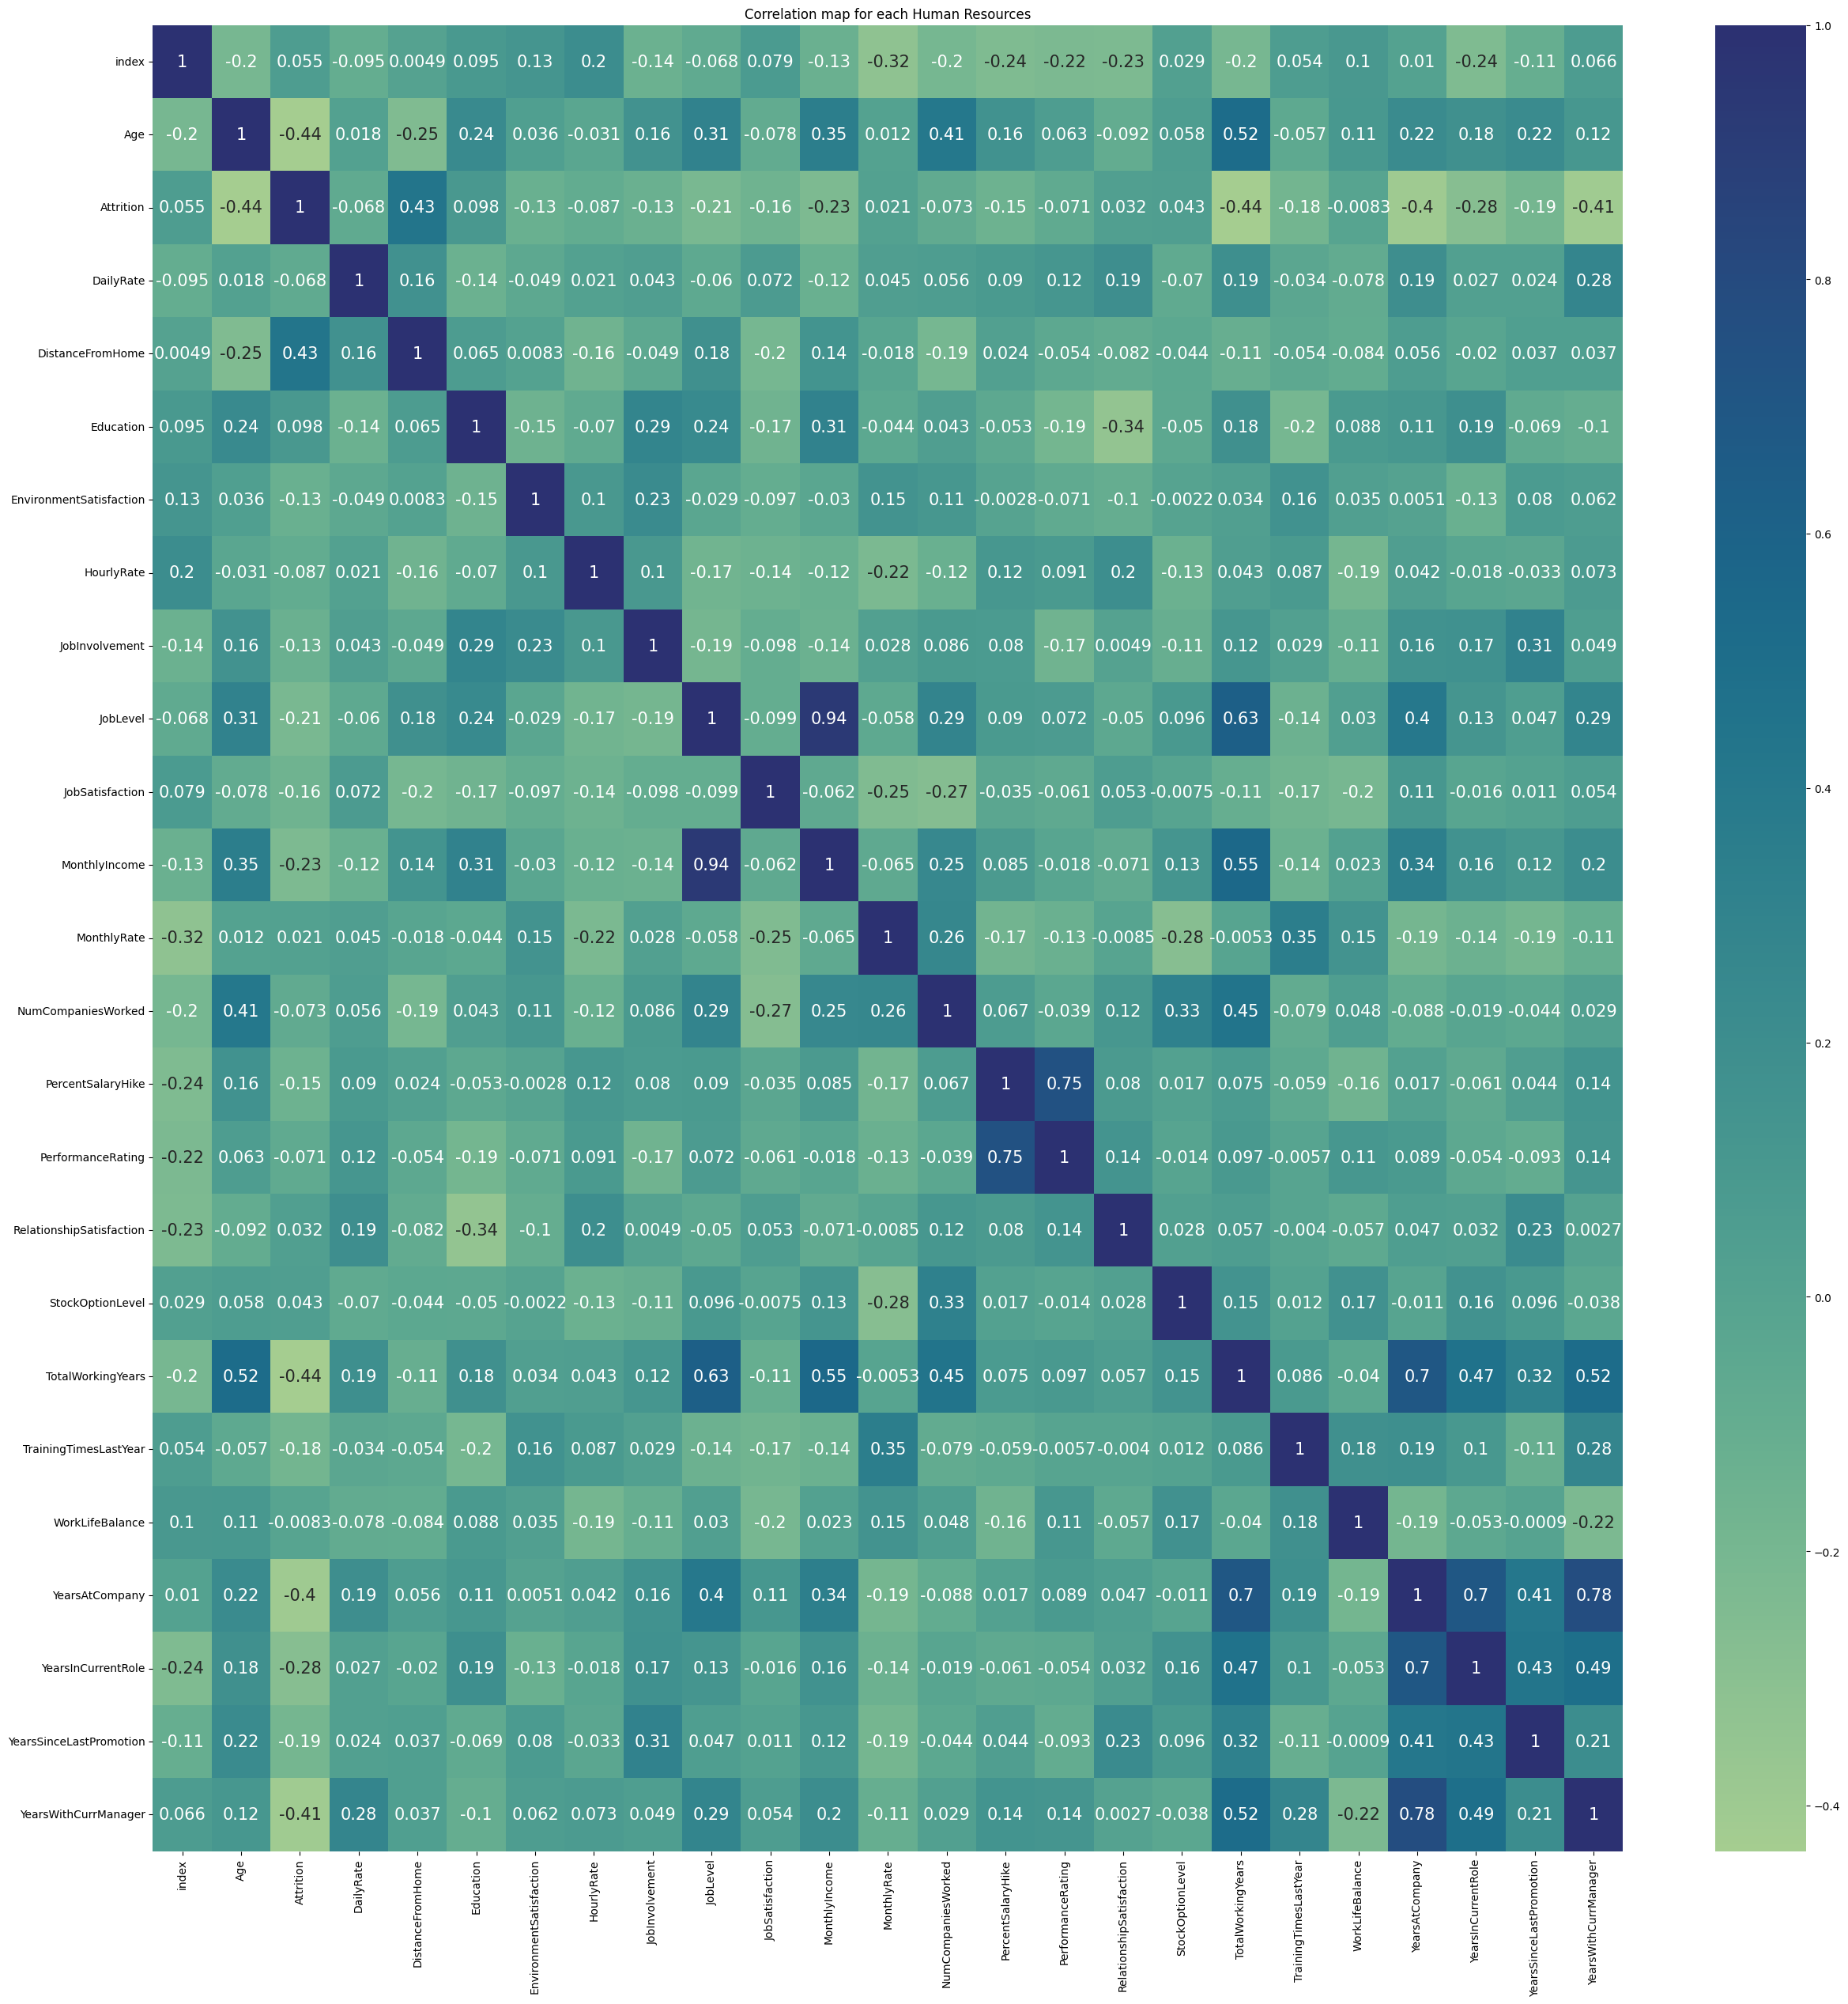

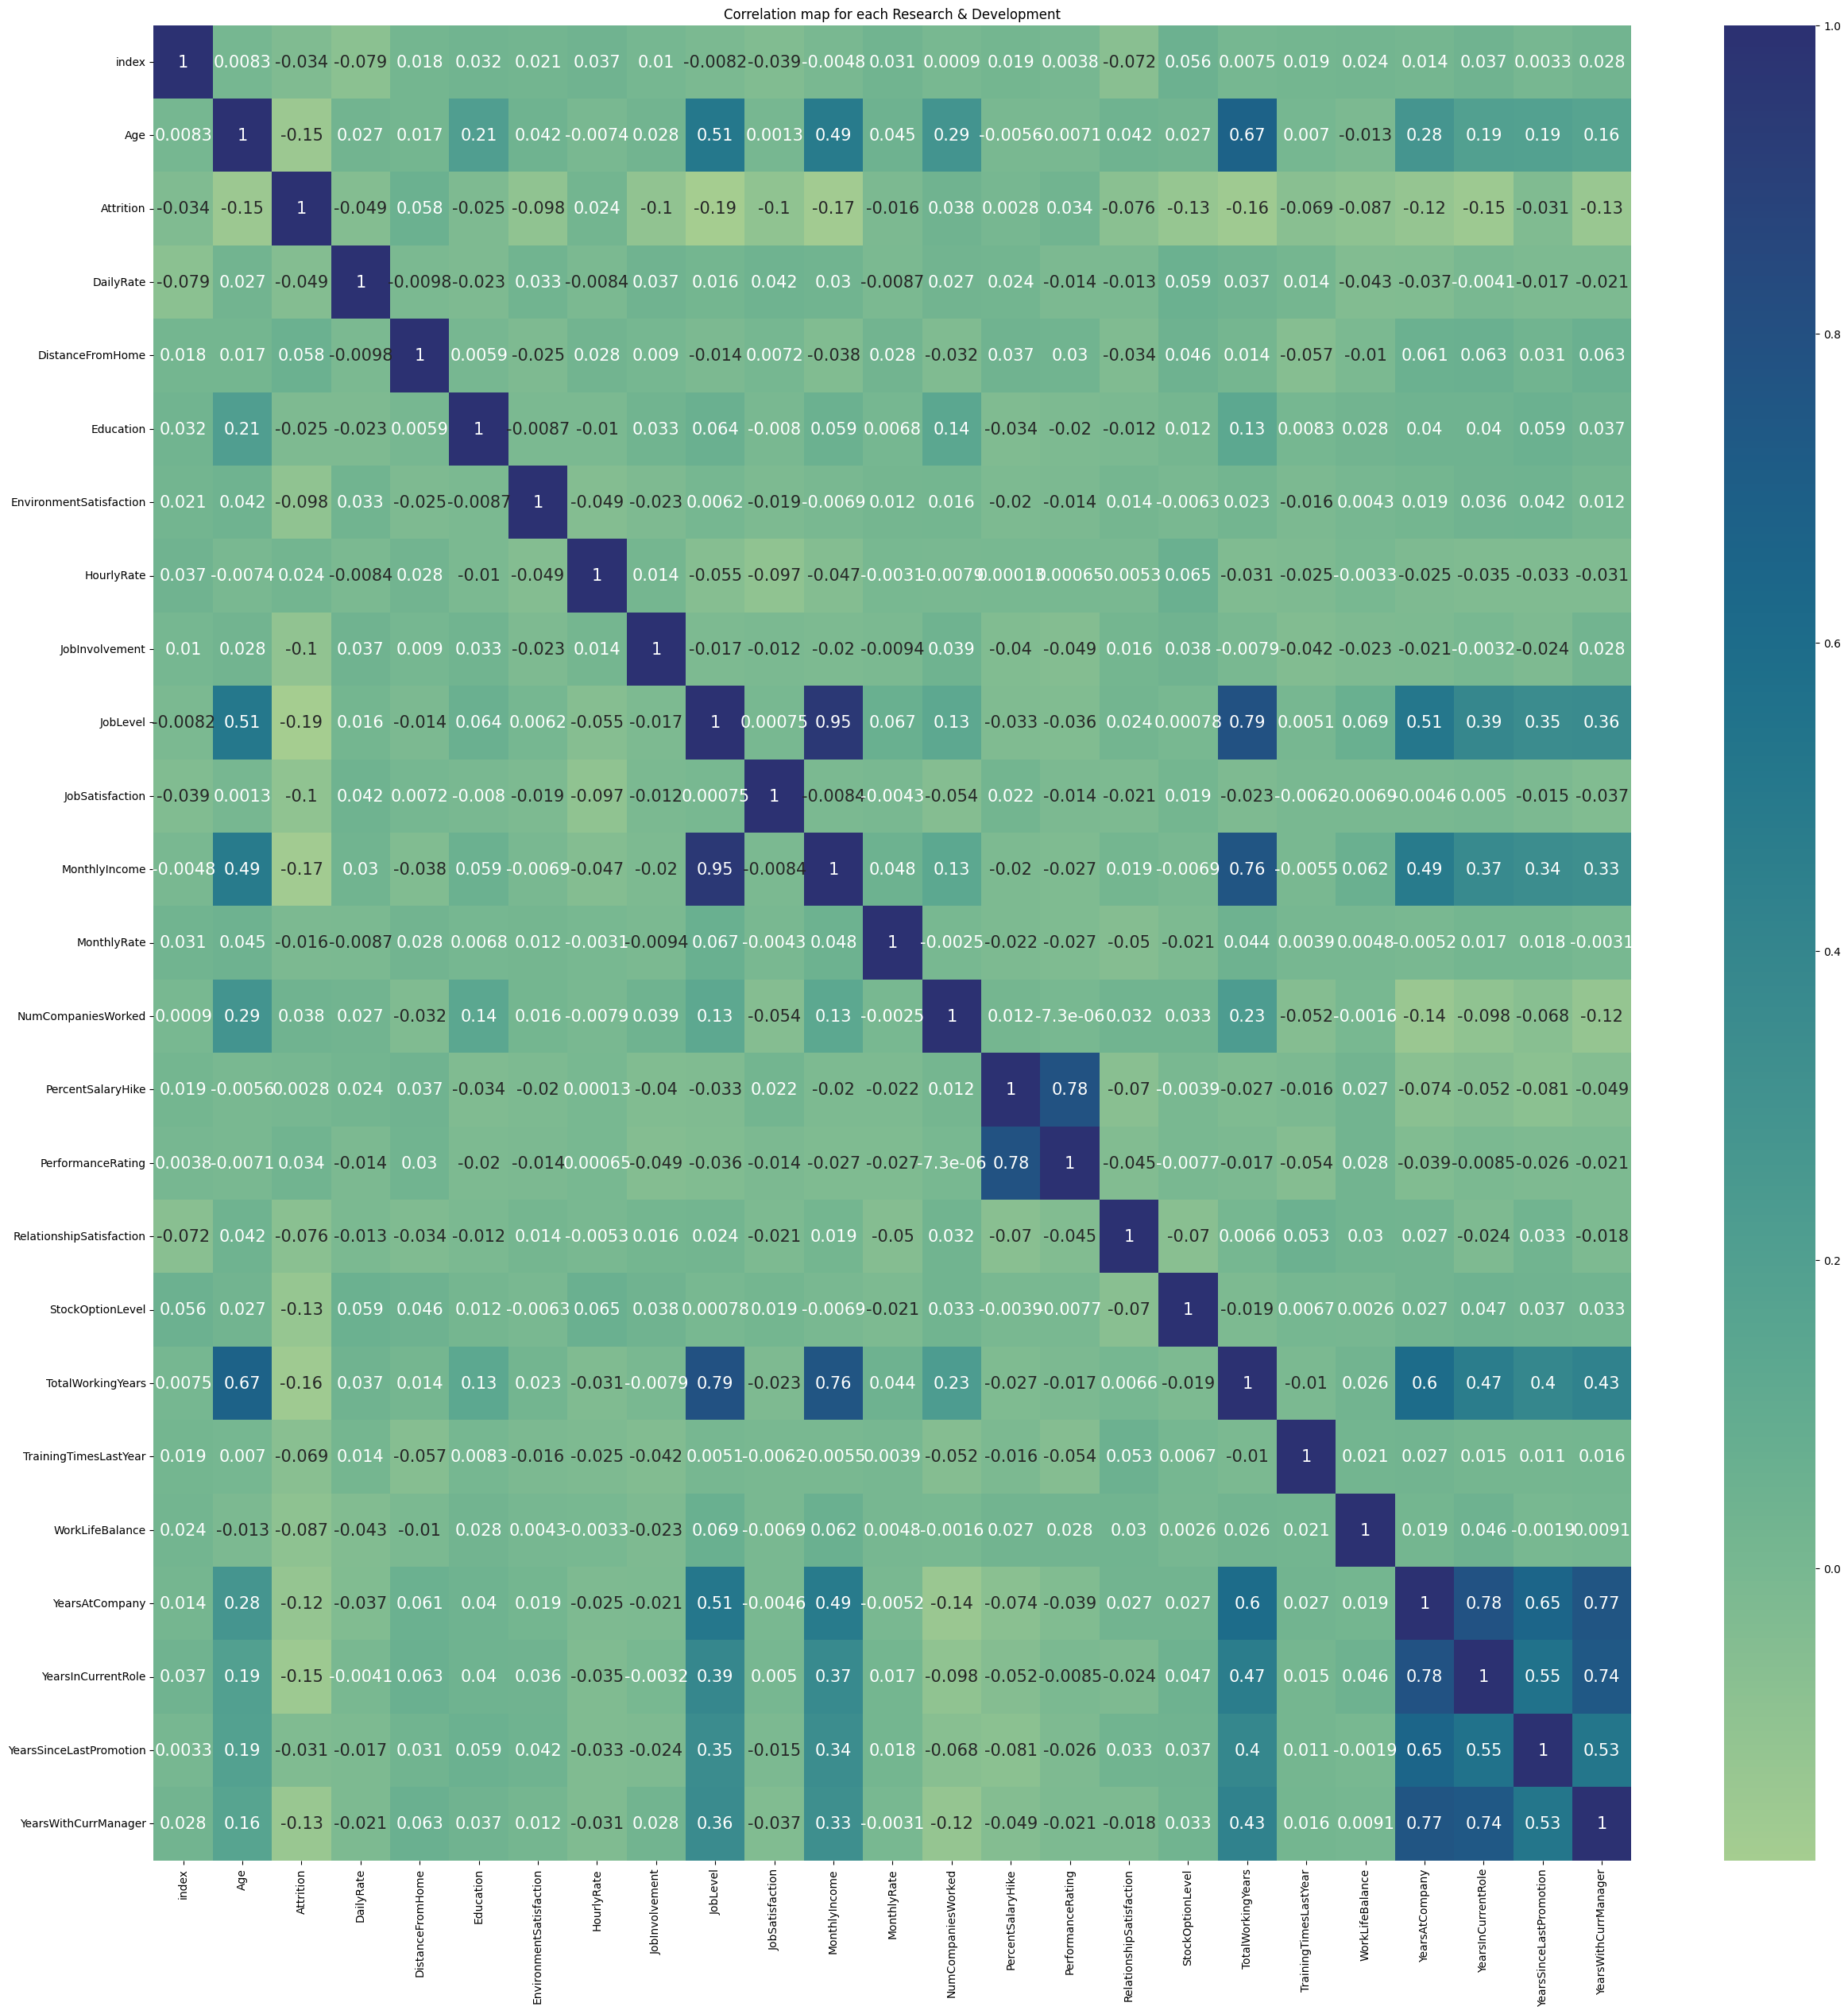

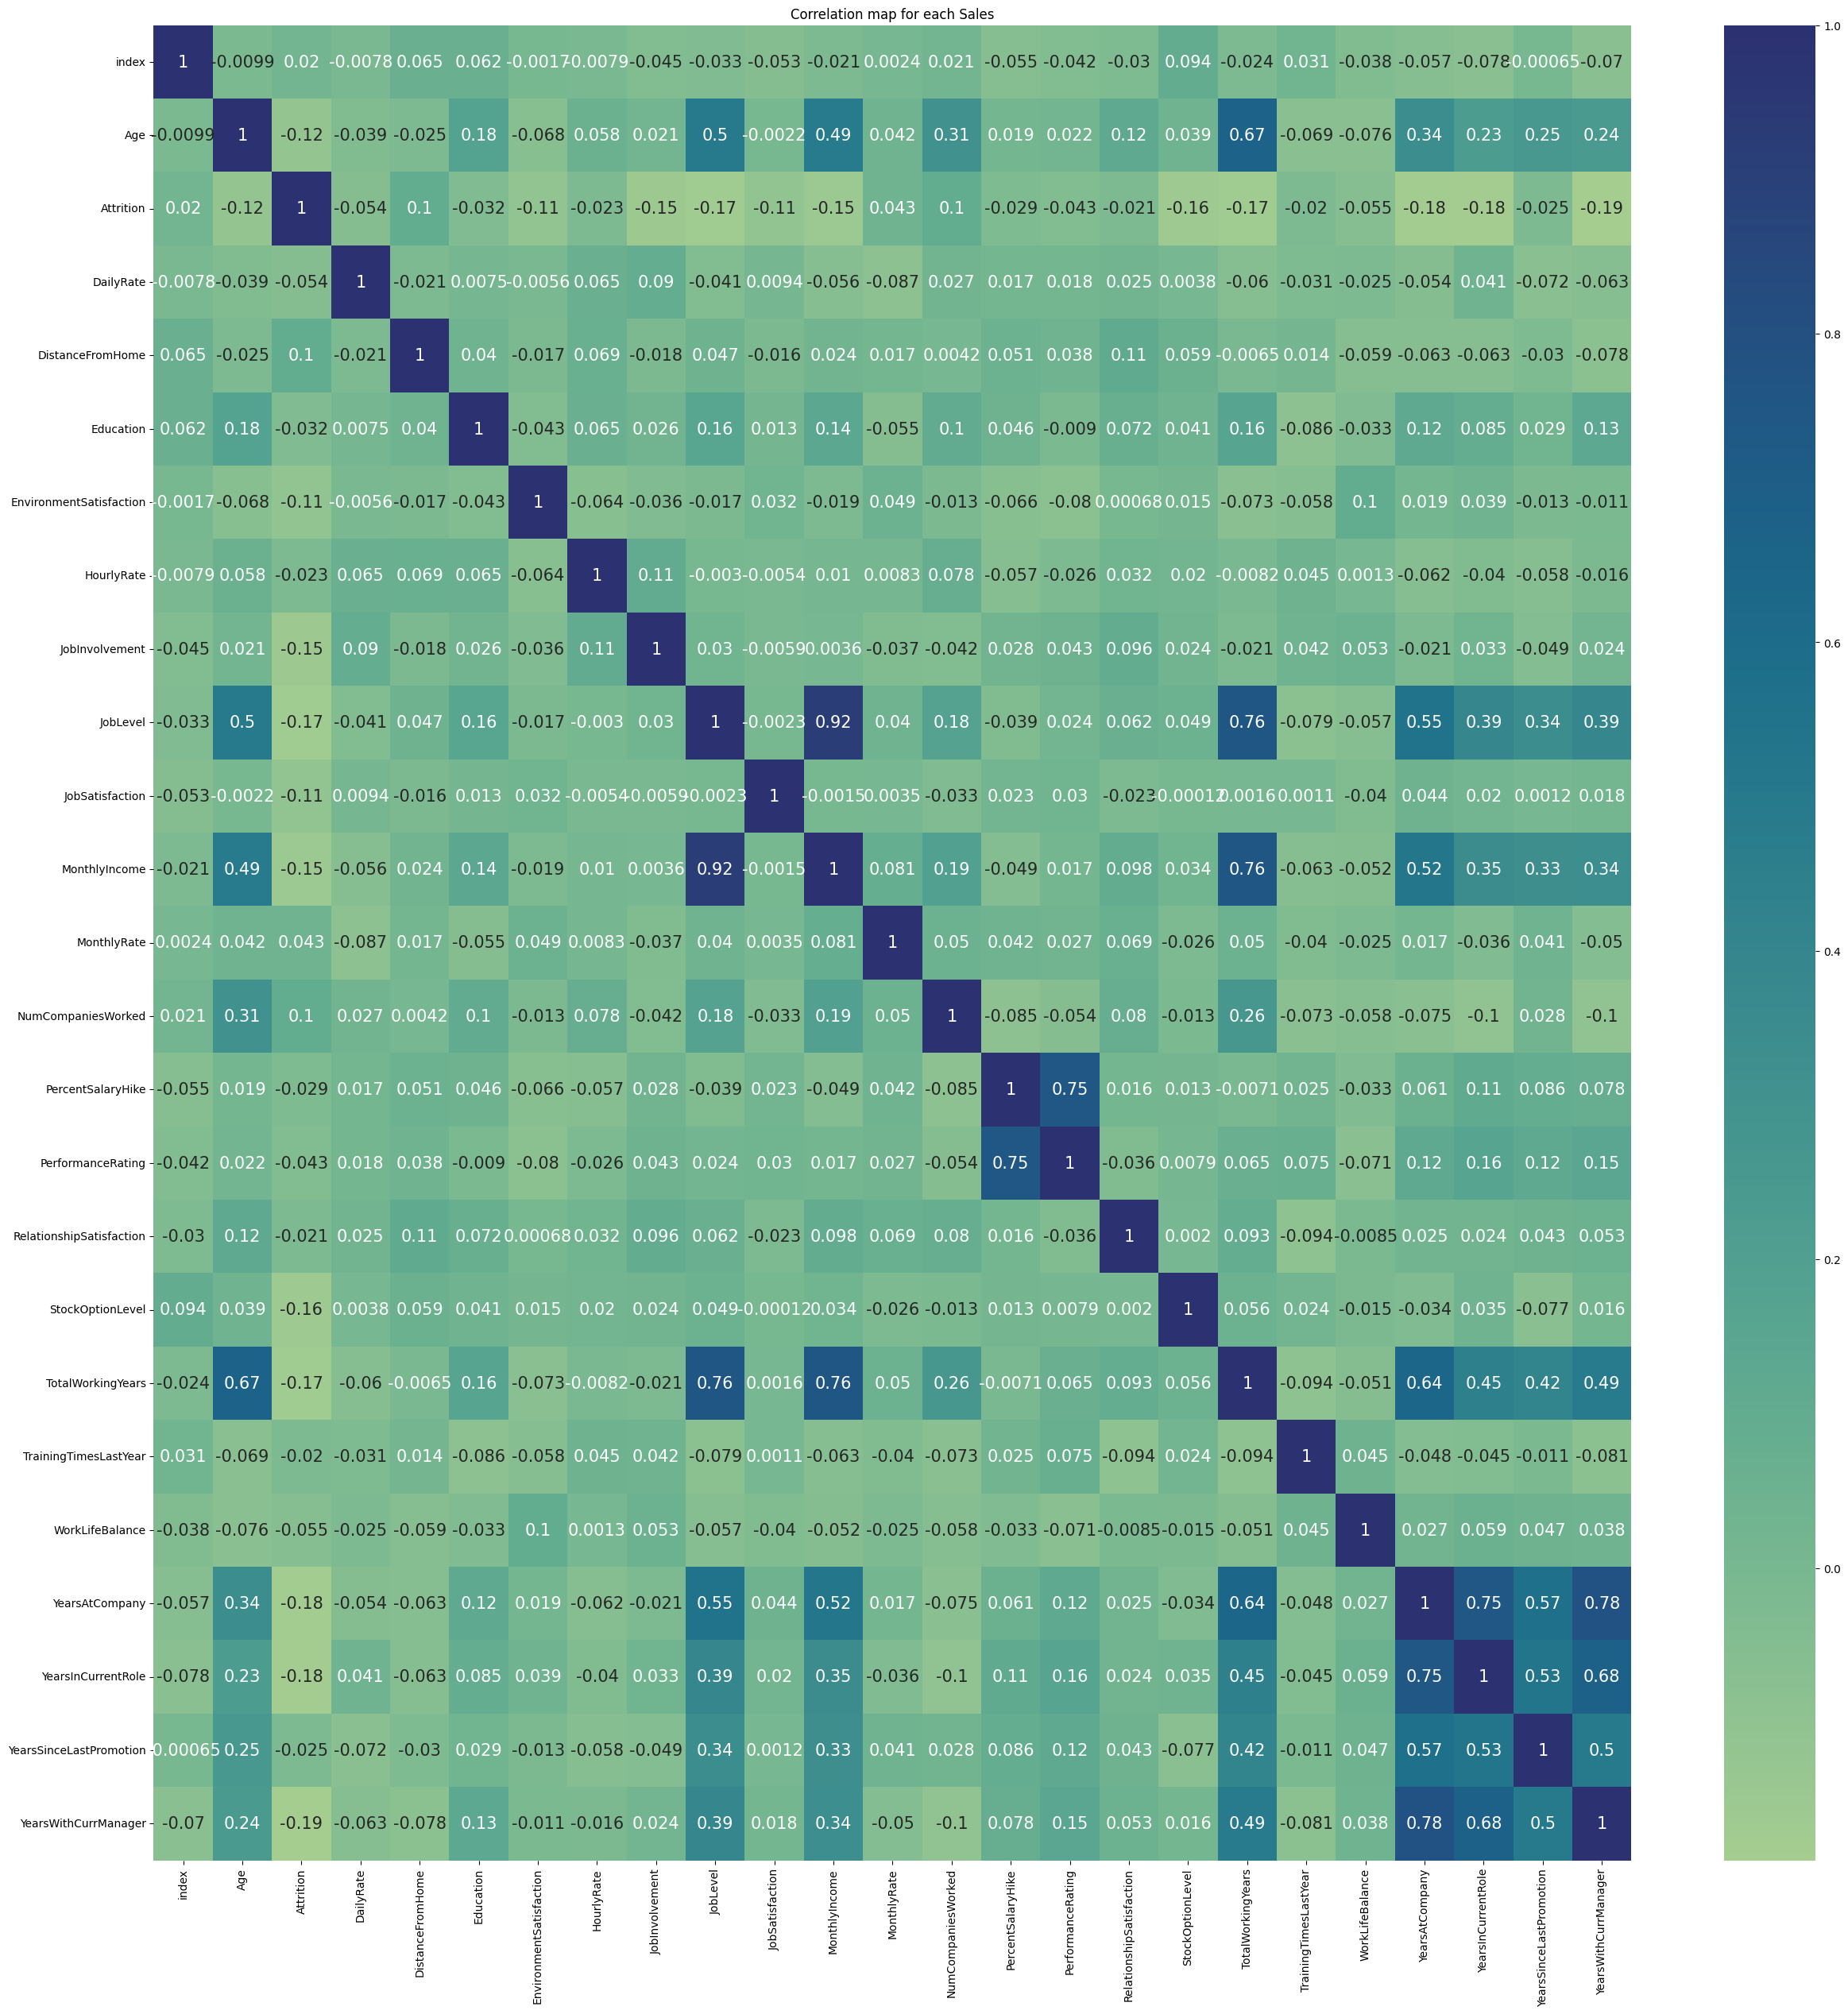

In [206]:
# Covariance between heatmap and numerical data
for department in department_data:
  data = clean_data[department]
  plt.figure(figsize=(30, 30))
  plt.title(f"Correlation map for each {department}")
  sns.heatmap(data.corr(), annot=True, cmap="crest", annot_kws={"size":15})

## Stepwise Regression

In [239]:
import statsmodels.api as sm

def get_stats(x,y):
    results = sm.OLS(y, x).fit()
    print(results.summary())

for department in clean_data:
  data = clean_data[department]
  int64_sales_columns = [column for column in data_sales.columns if data_sales[column].dtype == 'int64']
  X = data[int64_sales_columns]
  y = data["Attrition"]
  print("-------------------------------------------","\n")
  print(f"{department}")
  get_stats(X,y)


------------------------------------------- 

Human Resources
                                 OLS Regression Results                                
Dep. Variable:              Attrition   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.329e+22
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                   3.54e-292
Time:                        21:11:09   Log-Likelihood:                          1262.7
No. Observations:                  51   AIC:                                     -2477.
Df Residuals:                      27   BIC:                                     -2431.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t 

## **Model**

Logistic regression for whole dataset

In [207]:
X = pd.get_dummies(data.drop(columns=["Attrition"]))
y = data["Attrition"]

# Divide the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression models
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of logistic regression models: {accuracy:.2f}")


Accuracy of logistic regression models: 0.80


Logistic regression by different department

In [208]:
for department in clean_data:
  X = pd.get_dummies(clean_data[department].drop(columns=["Attrition"]))
  y = clean_data[department]["Attrition"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  logistic_regression = LogisticRegression(max_iter=10000)
  logistic_regression.fit(X_train, y_train)
  y_pred = logistic_regression.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy of {department} logistic regression models: {accuracy:.2f}")

Accuracy of Human Resources logistic regression models: 0.91
Accuracy of Research & Development logistic regression models: 0.90
Accuracy of Sales logistic regression models: 0.80
